## 교통사고 유형별 분석

데이터 준비<br />
<a href='https://www.data.go.kr/data/15029185/standard.do'>공공데이터 교통사고 유형</a>

In [1]:
#!pip install folium

You should consider upgrading via the '/Users/jin/.pyenv/versions/3.9.10/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import pandas as pd
import squarify

In [5]:
# 차트 스타일 
plt.style.use('fivethirtyeight')

# 폰트 설정 
d2coding_path = './D2Coding-Ver1.3.2-20180524.ttf'
fm.fontManager.addfont(d2coding_path)
plt.rcParams["font.family"] = 'D2Coding'

#마이너 부호 깨지 않도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False

In [7]:
file_path = './data_set/전국교통사고다발지역표준데이터.csv'
data_ori = pd.read_csv(file_path, encoding='EUC-KR')
data_ori.columns

Index(['사고지역관리번호', '사고연도', '사고유형구분', '위치코드', '사고다발지역시도시군구', '사고지역위치명', '사고건수',
       '사상자수', '사망자수', '중상자수', '경상자수', '부상신고자수', '위도', '경도', '사고다발지역폴리곤정보',
       '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [5]:
data_ori[['사고지역관리번호', '사고연도', '사고유형구분', '위치코드', '사고다발지역시도시군구', '사고건수', '사상자수', '부상신고자수', '사고지역위치명']]

,사고지역관리번호,사고연도,사고유형구분,위치코드,사고다발지역시도시군구,사고건수,사상자수,부상신고자수,사고지역위치명
0,2021030,2020,무단횡단,15134300,충북 청주흥덕1,4,4,0,충청북도 청주시 흥덕구 봉명동(은파교회 부근)
1,2021030,2020,무단횡단,16044400,충남 서산1,5,5,0,충청남도 서산시 석림동(하트리움 부근)
2,2021030,2020,무단횡단,16054400,충남 천안서북1,5,6,0,충청남도 천안시 서북구 성정동(엔제리너스천안성정 부근)
3,2021030,2020,무단횡단,16054400,충남 천안서북2,5,6,0,충청남도 천안시 서북구 성정동(LG천막 부근)
4,2021030,2020,무단횡단,16054400,충남 천안서북3,4,5,0,충청남도 천안시 서북구 두정동(플라리안 부근)
...,...,...,...,...,...,...,...,...,...
14473,2015046,2014,자전거,11710010,서울특별시 송파구10,8,8,4,서울특별시 송파구 거여동(마천사거리 부근)
14474,2015046,2014,자전거,11710011,서울특별시 송파구11,7,8,0,서울특별시 송파구 신천동(잠실역_일반국도3호선_진입_1 부근)
14475,2015046,2014,자전거,11710012,서울특별시 송파구12,7,7,1,서울특별시 송파구 삼전동(신양빌라 부근)
14476,2015046,2014,자전거,11710013,서울특별시 송파구13,7,7,3,서울특별시 송파구 가락동(문정시영아파트 부근)


In [8]:
data_pick = data_ori[['사고연도', '사고유형구분', '사고다발지역시도시군구', '사고지역위치명', '사고건수', '위도', '경도', '사고다발지역폴리곤정보']]
data_pick.head()

,사고연도,사고유형구분,사고다발지역시도시군구,사고지역위치명,사고건수,위도,경도,사고다발지역폴리곤정보
0,2020,무단횡단,충북 청주흥덕1,충청북도 청주시 흥덕구 봉명동(은파교회 부근),4,36.650390,127.456188,"{type:Polygon,coordinates:[[[127.45888288,36.6..."
1,2020,무단횡단,충남 서산1,충청남도 서산시 석림동(하트리움 부근),5,36.777868,126.460281,"{type:Polygon,coordinates:[[[126.46297567,36.7..."
2,2020,무단횡단,충남 천안서북1,충청남도 천안시 서북구 성정동(엔제리너스천안성정 부근),5,36.826788,127.140857,"{type:Polygon,coordinates:[[[127.14355147,36.8..."
3,2020,무단횡단,충남 천안서북2,충청남도 천안시 서북구 성정동(LG천막 부근),5,36.810455,127.140805,"{type:Polygon,coordinates:[[[127.14349966,36.8..."
4,2020,무단횡단,충남 천안서북3,충청남도 천안시 서북구 두정동(플라리안 부근),4,36.833746,127.140057,"{type:Polygon,coordinates:[[[127.14275156,36.8..."


In [9]:
data_pick.columns = ['year', 'type', 'region', 'street', 'accidents', 'lat', 'lon', 'polygon']

In [10]:
# data_pick.count()
data_pick = data_pick.copy() # 컬럼명 영어로 변경 후 깊은 복사가 필요함
data_pick.tail(20)

,year,type,region,street,accidents,lat,lon,polygon
14458,2014,자전거,서울특별시 강남구1,서울특별시 강남구 압구정동(서초구-강남구경계(5) 부근),6,37.524358,127.015378,"{type:Polygon,coordinates:[[[127.0169778,37.52..."
14459,2014,자전거,서울특별시 강남구2,서울특별시 강남구 일원동(대청공원앞 부근),6,37.492323,127.083538,"{type:Polygon,coordinates:[[[127.0851367,37.49..."
14460,2014,자전거,서울특별시 강남구3,서울특별시 강남구 역삼동(광진빌딩 부근),5,37.497138,127.045338,"{type:Polygon,coordinates:[[[127.0469368,37.49..."
14461,2014,자전거,서울특별시 강남구4,서울특별시 강남구 개포동(동진빌딩 부근),5,37.478874,127.049105,"{type:Polygon,coordinates:[[[127.0507036,37.48..."
14462,2014,자전거,서울특별시 강남구5,서울특별시 강남구 대치동(청실종합상가 부근),4,37.492384,127.058243,"{type:Polygon,coordinates:[[[127.0598422,37.49..."
14463,2014,자전거,서울특별시 강남구6,서울특별시 강남구 도곡동(롯데백화점앞 부근),4,37.496716,127.054352,"{type:Polygon,coordinates:[[[127.0559513,37.49..."
14464,2014,자전거,서울특별시 송파구1,서울특별시 송파구 잠실동(올림픽대로-백제고분로램프(3) 부근),16,37.518233,127.081505,"{type:Polygon,coordinates:[[[127.0831043,37.51..."
14465,2014,자전거,서울특별시 송파구2,서울특별시 송파구 석촌동(배명로터리 부근),10,37.502317,127.096595,"{type:Polygon,coordinates:[[[127.0981948,37.50..."
14466,2014,자전거,서울특별시 송파구3,서울특별시 송파구 가락동(제일오피스텔 부근),10,37.493047,127.117271,"{type:Polygon,coordinates:[[[127.1188702,37.49..."
14467,2014,자전거,서울특별시 송파구4,서울특별시 송파구 방이동(올림픽공원_남부순환로_진출_2 부근),10,37.513135,127.128650,"{type:Polygon,coordinates:[[[127.1302499,37.51..."


In [9]:
data_pick['region'] = data_pick['region'].str.replace(r'\d+', '', regex = 1)
data_pick.sample(15)

,year,type,region,street,accidents,lat,lon,polygon
2554,2017,보행노인,충청남도 서천군,충청남도 서천군 서천읍(서천한의원 부근),4,36.075234,126.687479,"{type:Polygon,coordinates:[[[126.68927582,36.0..."
10178,2020,보행노인,인천광역시 서구,인천광역시 서구 석남동(신현사거리 부근),3,37.513494,126.673701,"{type:Polygon,coordinates:[[[126.67549716,37.5..."
3444,2019,스쿨존어린이,서울특별시 은평구,서울특별시 은평구 불광동(연신초교 부근),3,37.626494,126.928409,"{type:Polygon,coordinates:[[[126.93110385,37.6..."
10592,2019,보행노인,인천광역시 연수구,인천광역시 연수구 옥련동(비류대로189 부근),3,37.428443,126.654995,"{type:Polygon,coordinates:[[[126.65679123,37.4..."
11451,2016,자전거,대전광역시 중구,대전광역시 중구 태평동(태평오거리 부근),4,36.326143,127.393500,"{type:Polygon,coordinates:[[[127.39529627,36.3..."
7375,2013,자전거,부산광역시 수영구,부산광역시 수영구 남천동(광안대교대연램프 부근),6,35.136858,129.110275,"{type:Polygon,coordinates:[[[129.1118266,35.13..."
6208,2018,보행노인,서울특별시 양천구,서울특별시 양천구 신월동(중앙빌딩 부근),5,37.520951,126.834943,"{type:Polygon,coordinates:[[[126.83673997,37.5..."
6449,2023,자전거,경상북도 포항시 남구,경상북도 포항시 남구 대도동(상공회의소사거리 부근),4,36.018328,129.359991,"{type:Polygon,coordinates:[[[129.36178773,36.0..."
6322,2013,보행노인,강원특별자치도 홍천군,강원특별자치도 홍천군 홍천읍(동아미용타운 부근),4,37.688823,127.883193,"{type:Polygon,coordinates:[[[127.8847966,37.69..."
12739,2014,보행노인,서울특별시 관악구,서울특별시 관악구 봉천동(당곡사거리 부근),5,37.489073,126.927225,"{type:Polygon,coordinates:[[[126.9288239,37.49..."


In [11]:
data_gr_type = data_pick.groupby('type')['accidents'].sum().reset_index(name='count')
data_gr_type = data_gr_type.sort_values(['count'], ascending = 0)
data_gr_type

,type,count
4,자전거,24939
1,보행노인,23165
0,무단횡단,14805
2,보행어린이,3802
3,스쿨존어린이,989


In [12]:
from IPython.display import display, HTML

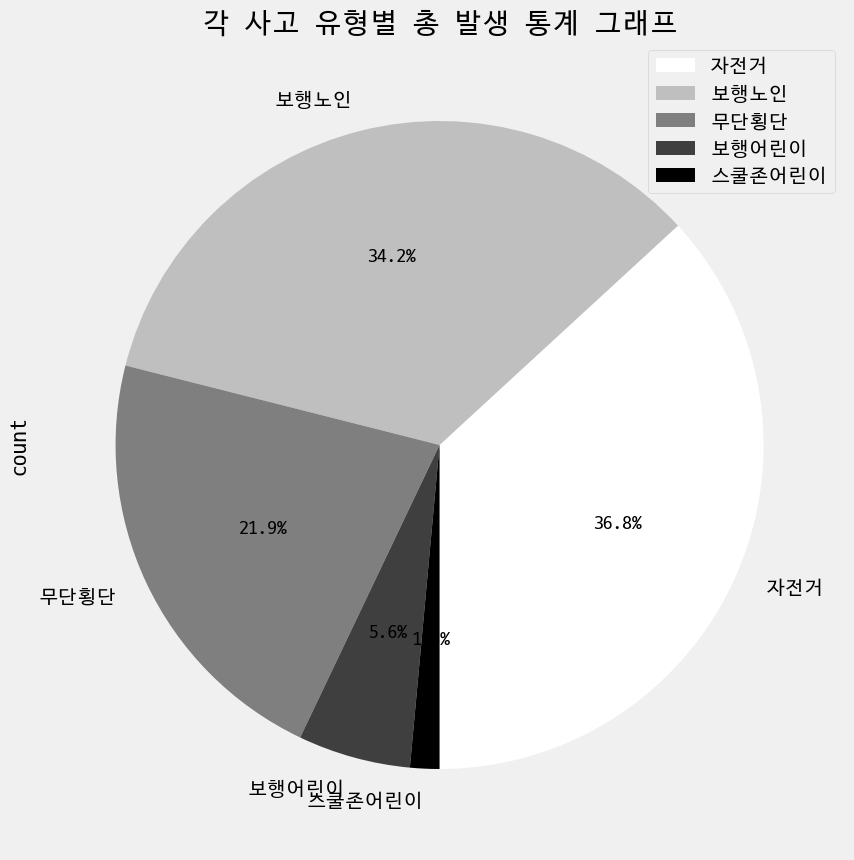

In [12]:
data_gr_type.plot( # 차트 그리기 함수
    kind = 'pie', # 차트 유형 - 파이 
    y = 'count', # y값: count 열
    labels = data_gr_type['type'], # 각 대칭 이름: type 열 
    figsize = (10, 10), # 사이즈: 10*10 인치
    startangle = -90, # 시작 각도 위치: -90도
    autopct = '%.1f%%', # 소수점 1자리와 %로 백분율 표시
    title = '각 사고 유형별 총 발생 통계 그래프', # 제목
    cmap = matplotlib.cm.binary # 색상(회색톤)
)
plt.savefig('plottest.png')

In [13]:
display(HTML(f'''
    <div style='display: flex; justify-content: space-around'>
    <div style=''>{data_gr_type.to_html(index=0)}</div>
    <div><img src='plottest.png'></img></div>
    </div>
'''))

type,count
자전거,24939
보행노인,23165
무단횡단,14805
보행어린이,3802
스쿨존어린이,989


In [14]:
data_pick2 = data_pick.copy()
data_school_zone = data_pick2[data_pick['type']=='스쿨존어린이']
data_school_zone.sample(20)

,year,type,region,street,accidents,lat,lon,polygon
3212,2012,스쿨존어린이,서울특별시 구로구1,서울특별시 구로구 개봉동(개봉초교 부근),2,37.489940,126.856930,"{type:Polygon,coordinates:[[[126.8593288,37.49..."
13091,2016,스쿨존어린이,서울특별시 동작구1,서울특별시 동작구 흑석동(중대부속초교 부근),3,37.506883,126.961665,"{type:Polygon,coordinates:[[[126.96435952,37.5..."
8525,2021,스쿨존어린이,경기도 안산시 상록구3,경기도 안산시 상록구 이동(매화초교 부근),2,37.306402,126.861106,"{type:Polygon,coordinates:[[[126.86380128,37.3..."
12556,2015,스쿨존어린이,경기도 군포시1,경기도 군포시 산본동(산본초교입구사거리 부근),2,37.367705,126.933217,"{type:Polygon,coordinates:[[[126.93591218,37.3..."
5633,2013,스쿨존어린이,충청북도 청주시 흥덕구1,충청북도 청주시 흥덕구 분평동(분평초교 부근),2,36.612201,127.492720,"{type:Polygon,coordinates:[[[127.4950915,36.61..."
13071,2016,스쿨존어린이,대구광역시 달서구1,대구광역시 달서구 상인동(월서초교 부근),2,35.821390,128.531296,"{type:Polygon,coordinates:[[[128.53399102,35.8..."
14258,2014,스쿨존어린이,광주광역시 광산구1,광주광역시 광산구 신가동(금구초교 부근),2,35.176090,126.814799,"{type:Polygon,coordinates:[[[126.8171276,35.17..."
12530,2015,스쿨존어린이,충청남도 금산군1,충청남도 금산군 금산읍(금산중앙초교 부근),2,36.101987,127.488126,"{type:Polygon,coordinates:[[[127.49082108,36.1..."
14282,2014,스쿨존어린이,전북특별자치도 군산시1,전북특별자치도 군산시 나운동(서해초교 부근),2,35.959272,126.698502,"{type:Polygon,coordinates:[[[126.7008533,35.96..."
629,2018,스쿨존어린이,대구광역시 달서구2,대구광역시 달서구 상인동(대구월서초교 부근),2,35.821210,128.531731,"{type:Polygon,coordinates:[[[128.53442606,35.8..."


In [15]:
data_fix = data_school_zone.groupby('year')['accidents'].sum().reset_index(name='count')
data_fix

,year,count
0,2012,74
1,2013,56
2,2014,90
3,2015,88
4,2016,95
5,2017,68
6,2018,87
7,2019,87
8,2020,72
9,2021,85


<Axes: title={'center': '연도별 스쿨존 어린이 사고 발생 통계'}, ylabel='count'>

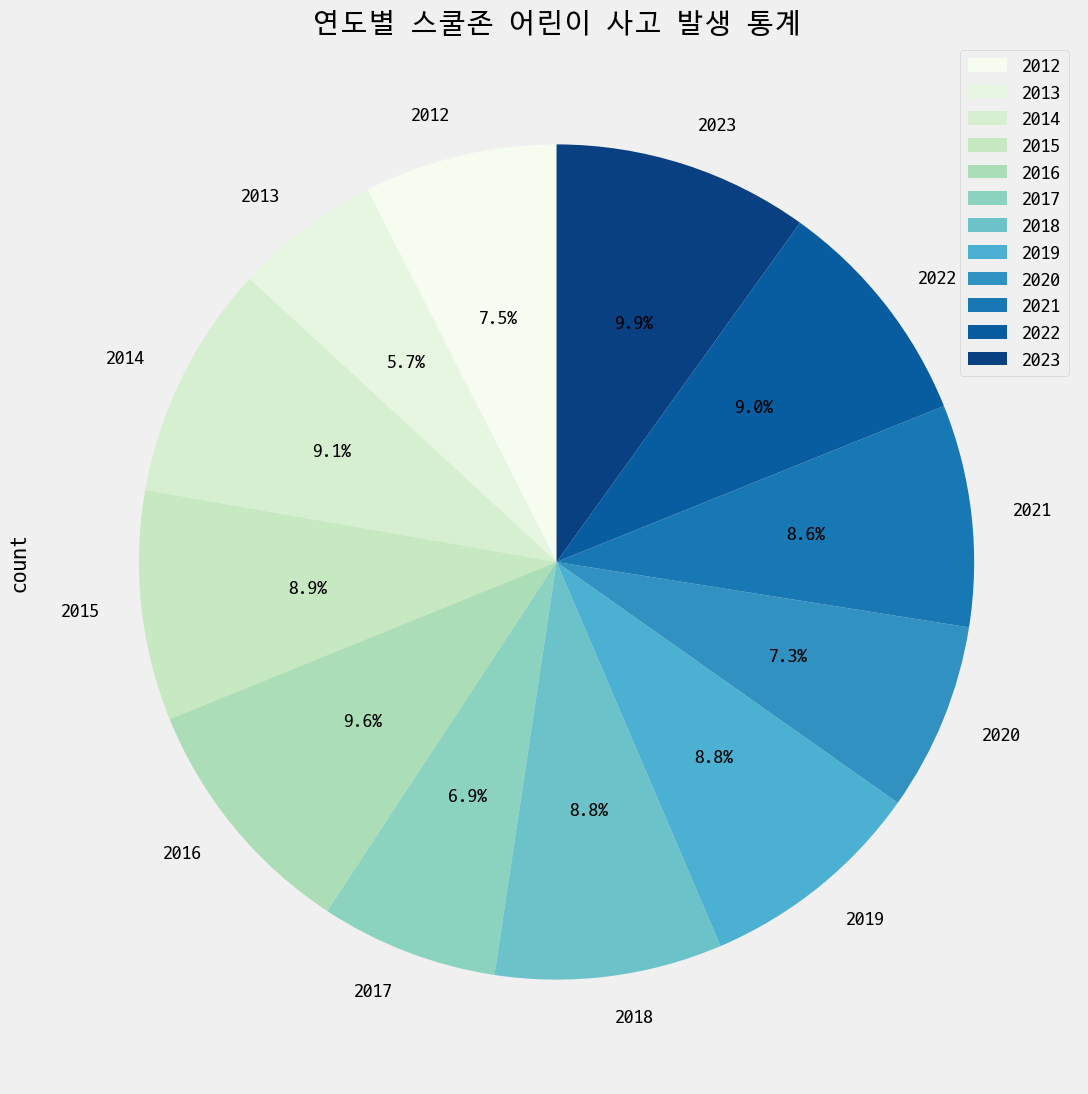

In [16]:
data_fix.plot(
    kind = 'pie',
    y = 'count',
    labels = data_fix['year'],
    figsize = (12, 15),
    startangle = 90,
    autopct = '%.1f%%',
    title = '연도별 스쿨존 어린이 사고 발생 통계',
    cmap = matplotlib.cm.GnBu
)
# plt.savefig('plottest2.png')

In [17]:
#!pip install dash

     |████████████████████████████████| 7.8 MB 6.4 MB/s eta 0:00:01
     |████████████████████████████████| 227 kB 54.7 MB/s eta 0:00:01
     |████████████████████████████████| 19.1 MB 153.1 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 14.5 MB/s ta 0:00:011
     |████████████████████████████████| 97 kB 9.8 MB/s  eta 0:00:011
You should consider upgrading via the '/Users/jin/.pyenv/versions/3.9.10/bin/python3.9 -m pip install --upgrade pip' command.


In [18]:
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/gapminder_unfiltered.csv')
app = Dash()
app.layout = [
    html.H1(children='Title of Dash App', style={'textAlign':'center'}),
    dcc.Dropdown(df.country.unique(), 'Chile', id='dropdown-selection'),
    dcc.Graph(id='graph-content')
]

@callback(
    Output('graph-content', 'figure'),
    Input('dropdown-selection', 'value')
)
def update_graph(value):
    dff = df[df.country==value]
    return px.line(dff, x='year', y='pop')

if __name__ == '__main__':
    app.run(debug=True)

In [20]:
print(pd.__all__)

['ArrowDtype', 'BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt8Dtype', 'api', 'array', 'arrays', 'bdate_range', 'concat', 'crosstab', 'cut', 'date_range', 'describe_option', 'errors', 'eval', 'factorize', 'get_dummies', 'from_dummies', 'get_option', 'infer_freq', 'interval_range', 'io', 'isna', 'isnull', 'json_normalize', 'lreshape', 'melt', 'merge', 'merge_asof', 'merge_ordered', 'notna', 'notnull', 'offsets', 'option_context', 'options', 'period_range', 'pivot', '

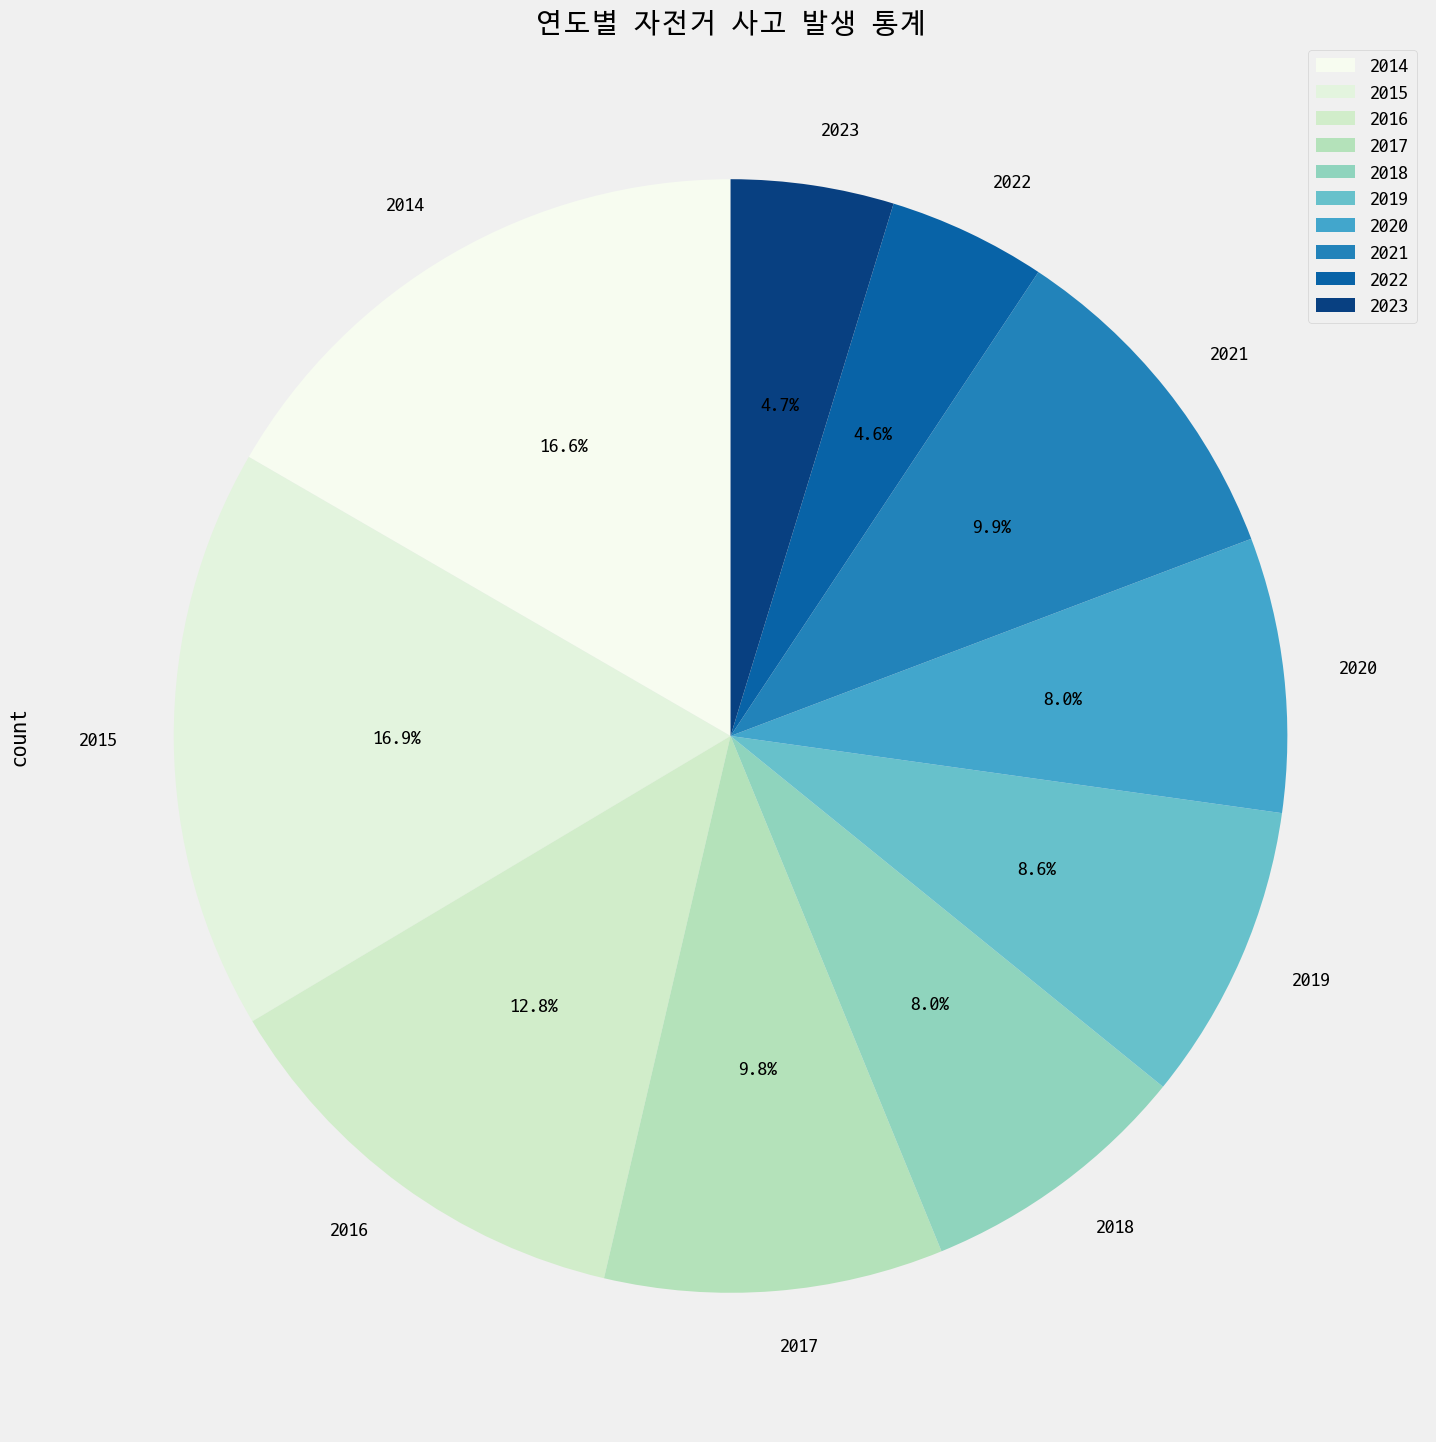

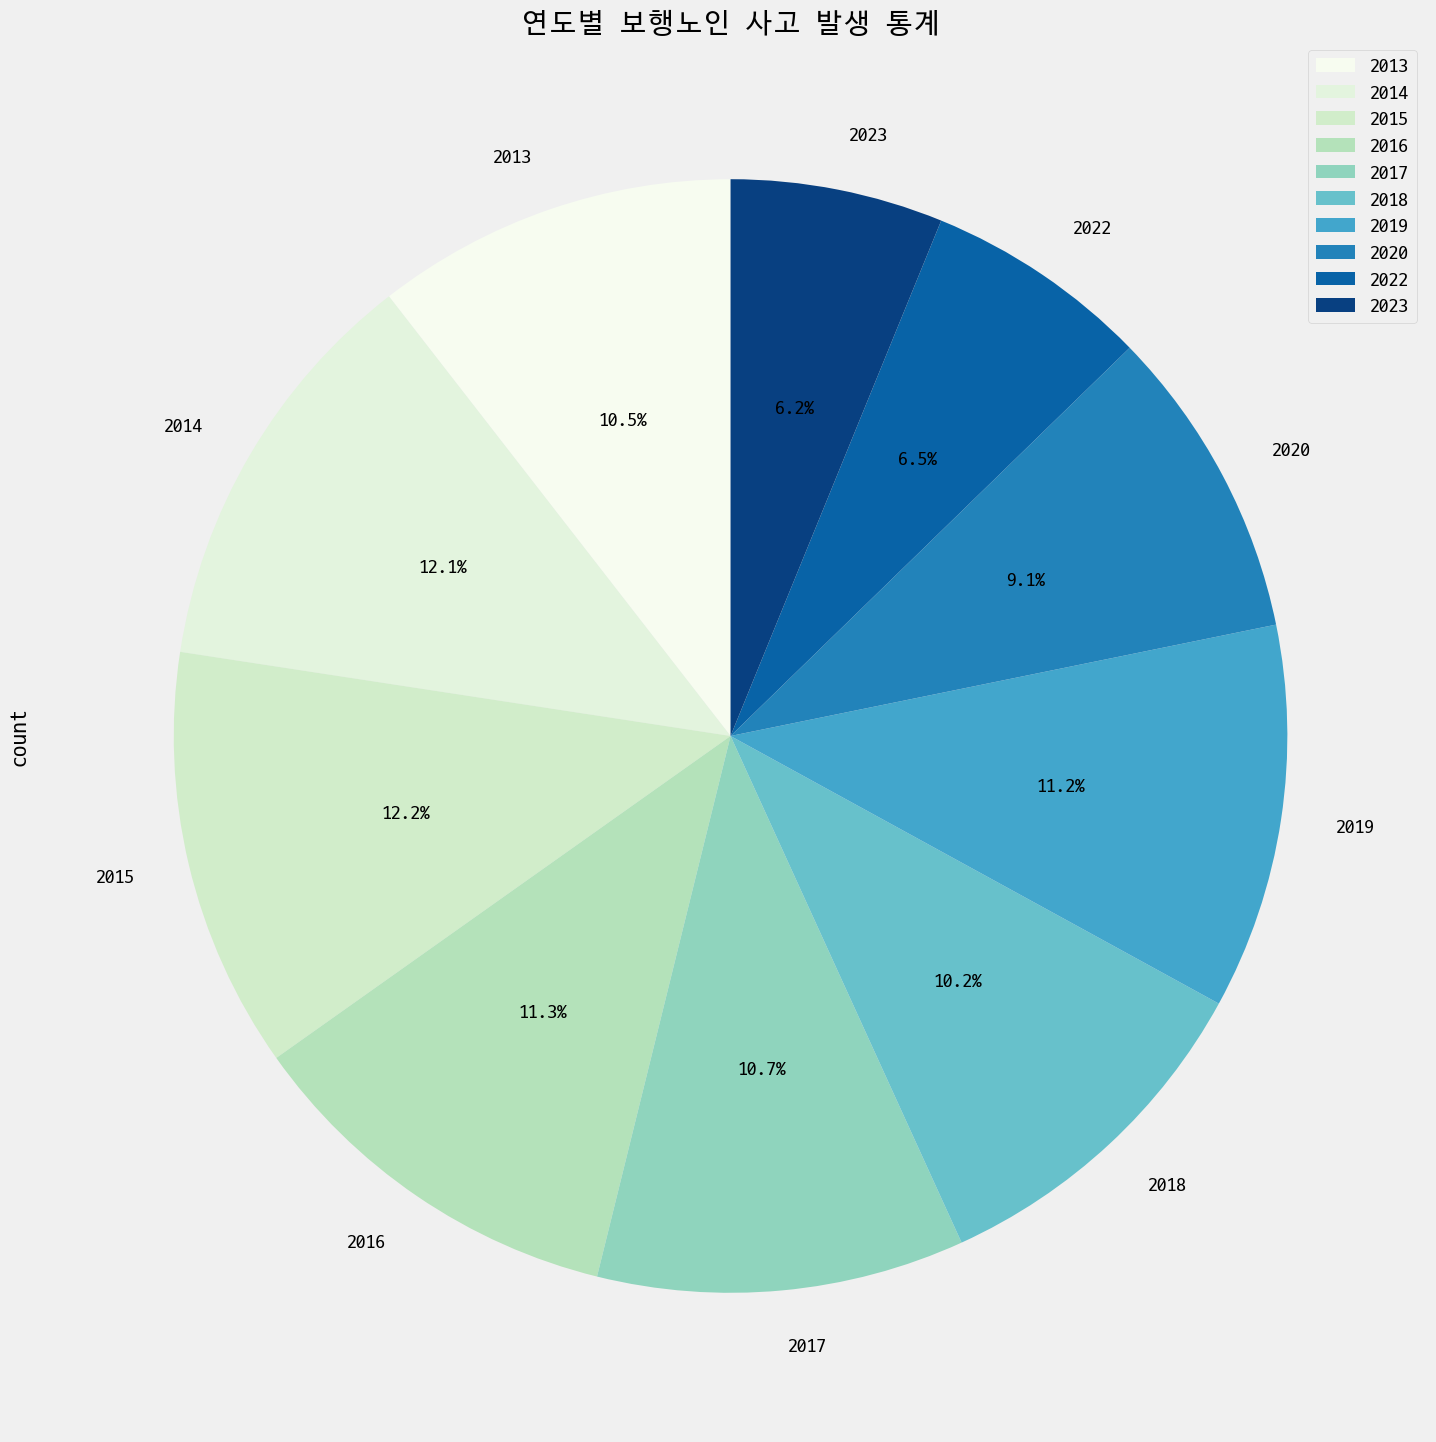

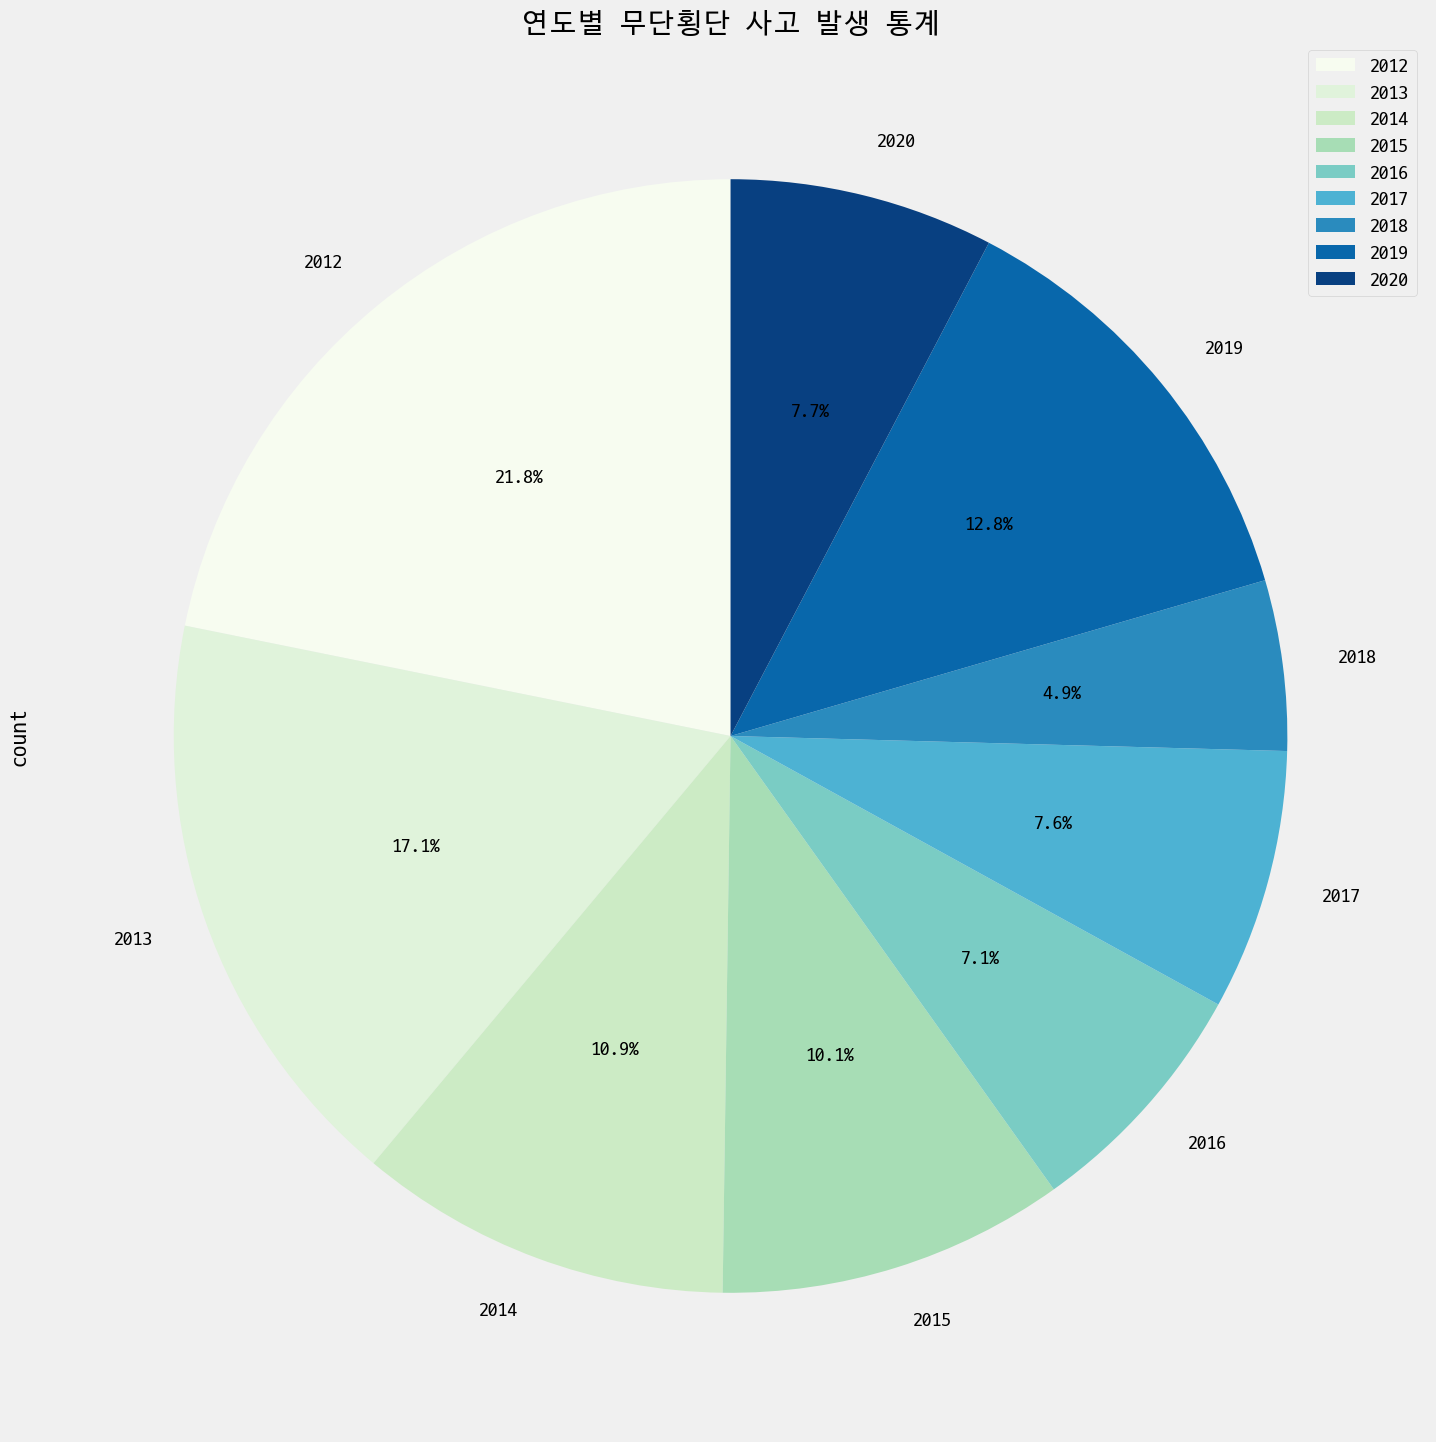

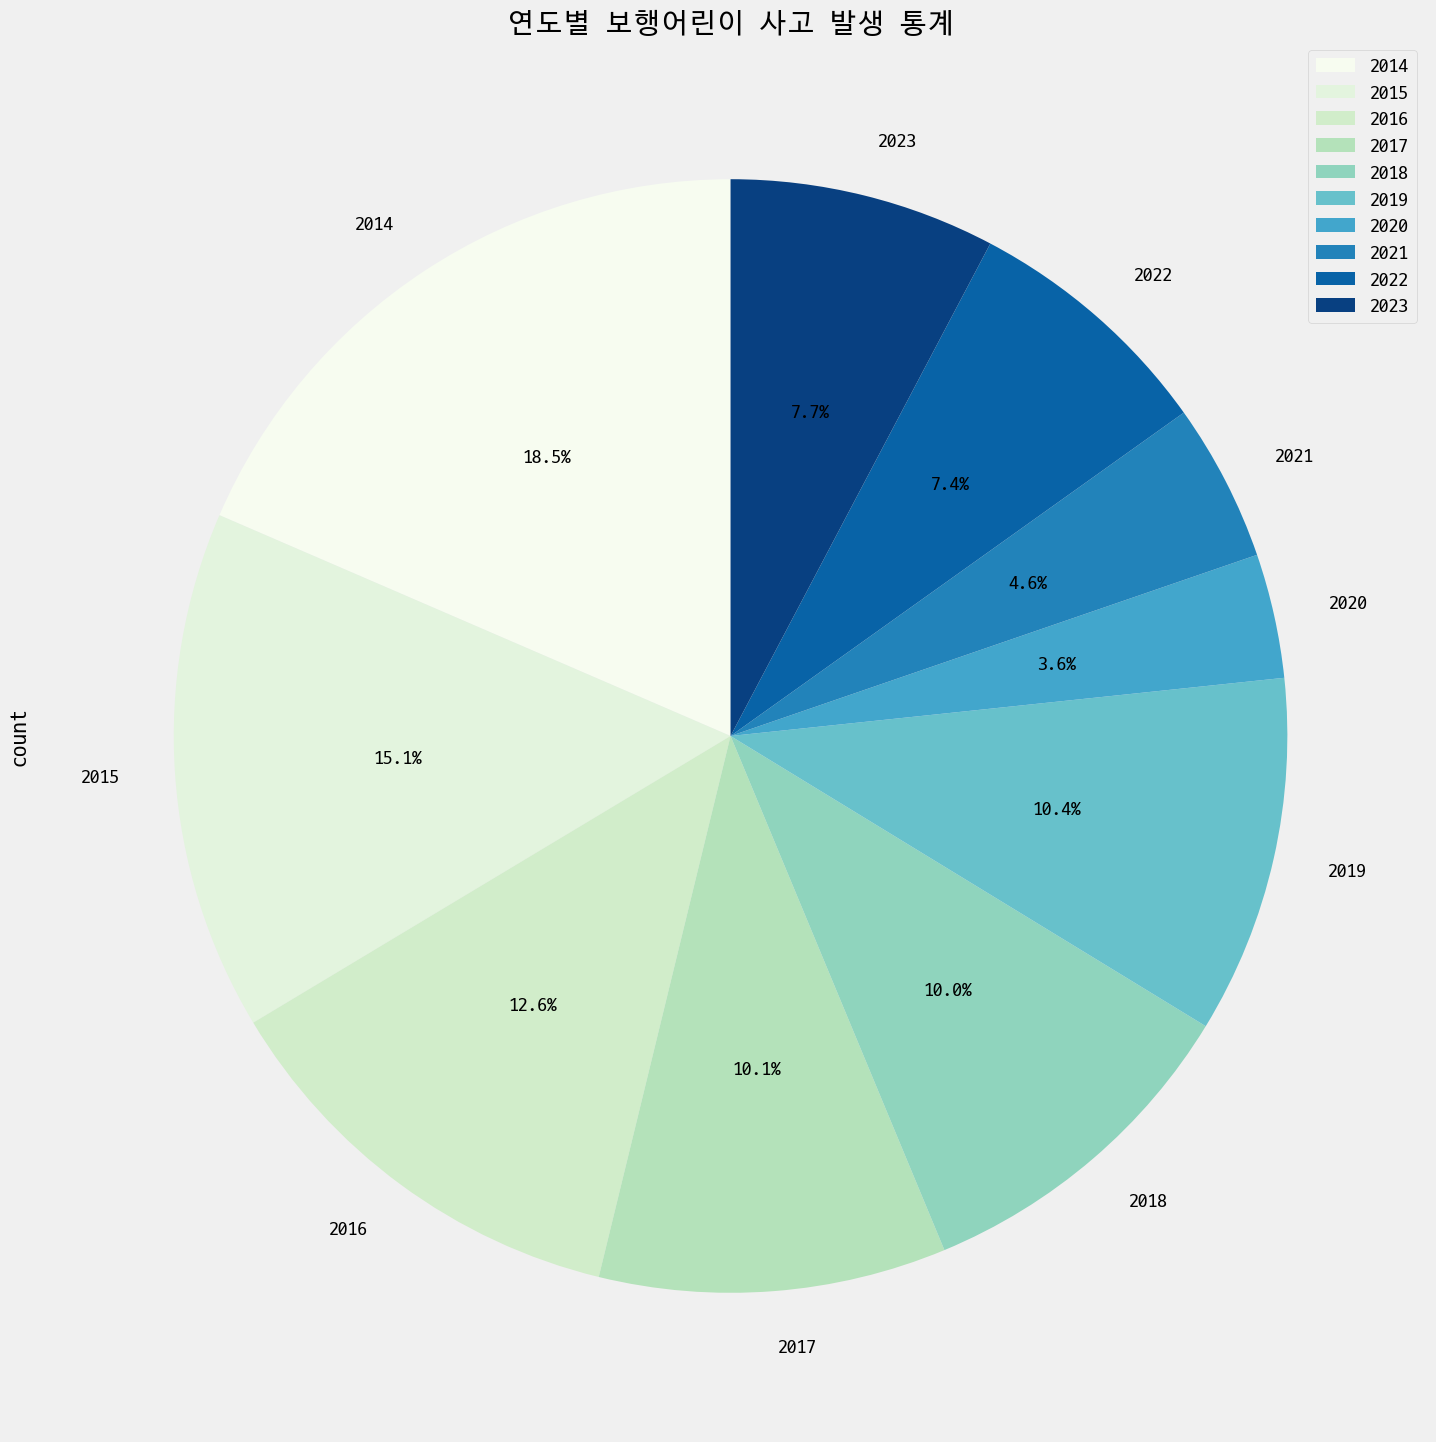

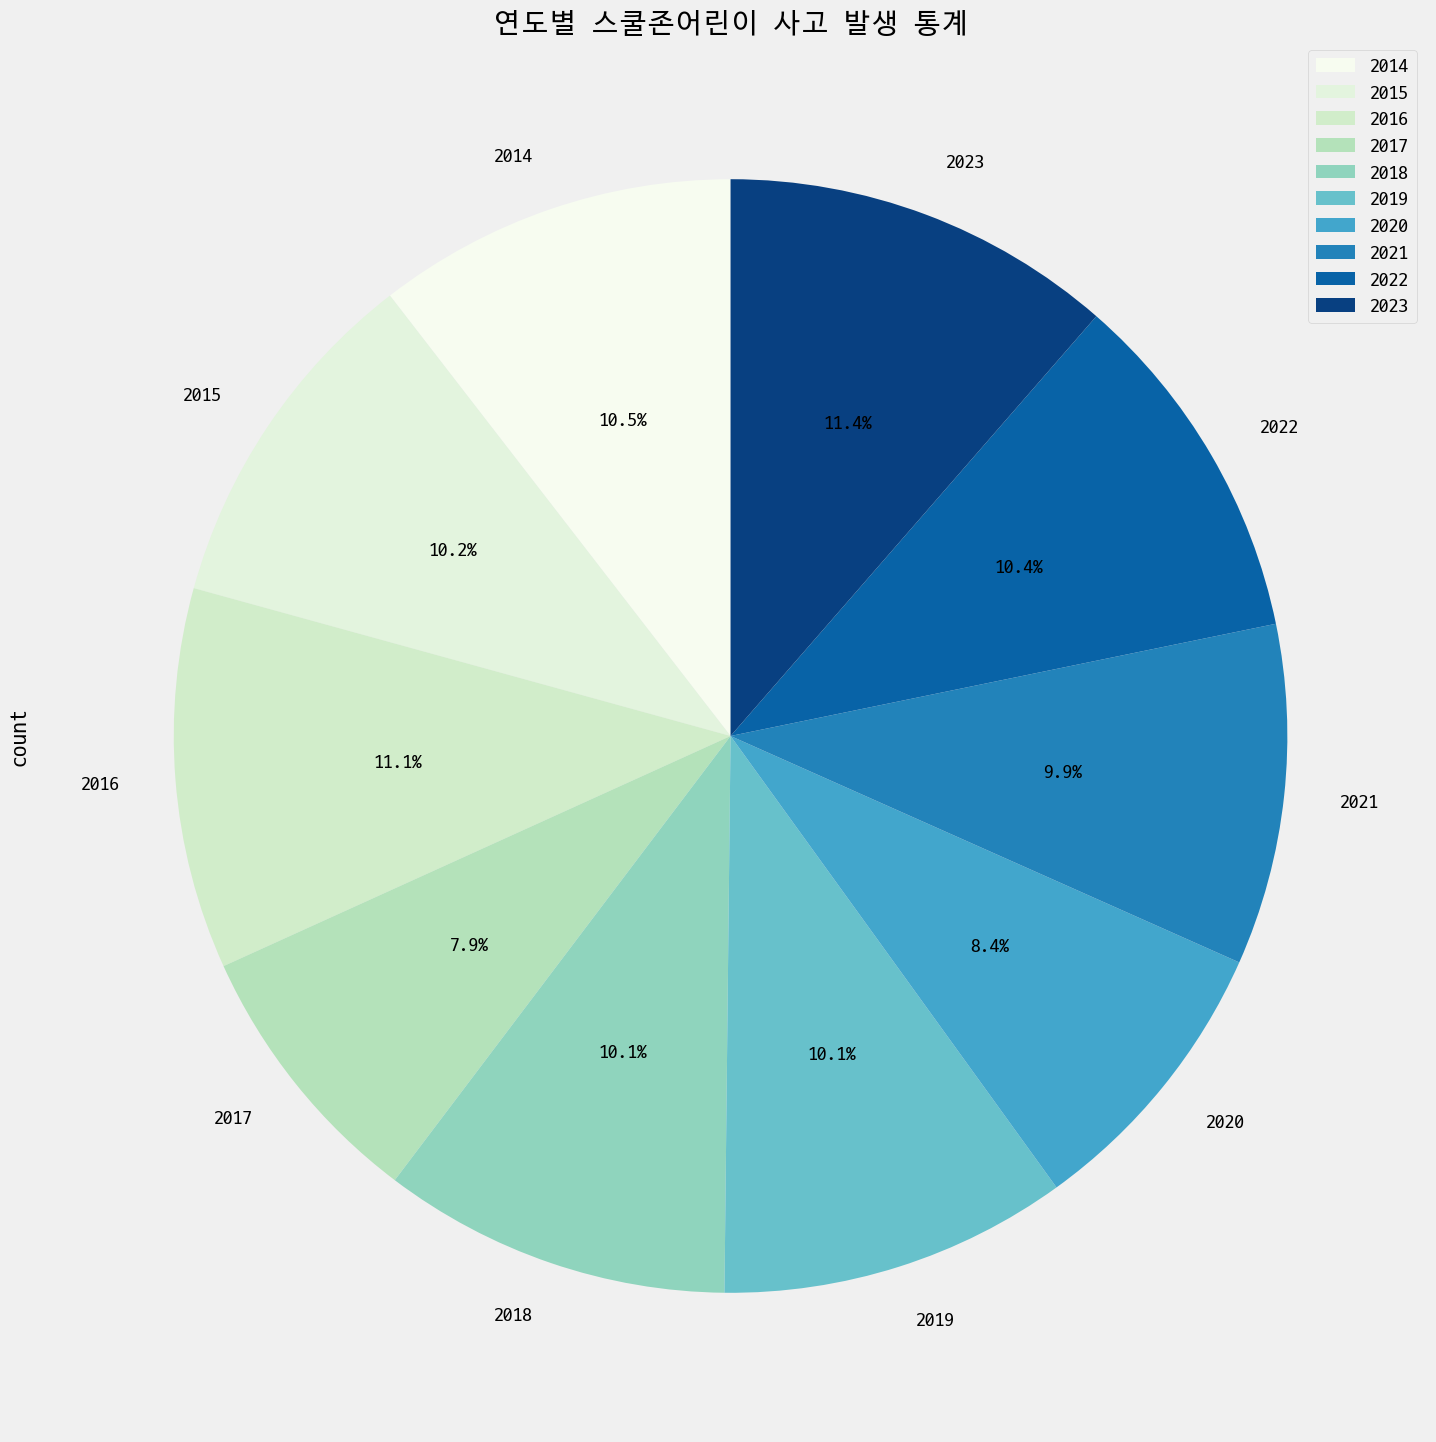

In [21]:
for t in data_gr_type['type']: # 사고 유형별 총 사고 발생량에서 type 컬럼 따오기
    data_pickx = data_pick.copy() # 객체 깊은 복사
    data_auto = data_pickx[data_pickx['type'] == t] # 각 유형(t)에 대한 데이터만 가져오기
    data_auto = data_auto.groupby('year')['accidents'].sum().reset_index(name='count').tail(10) # 이하 동일, 연도별 그룹화, 사고건수 부분합 및 인덱스 이름 지정
    data_auto.plot( # 차트 그리기
        kind = 'pie',
        y = 'count',
        labels = data_auto['year'],
        figsize = (16, 20), # 사이즈 늘림
        startangle = 90,
        autopct = '%.1f%%',
        title = f'연도별 {t} 사고 발생 통계',
        cmap = matplotlib.cm.GnBu # 색상: 라이트그린-다크블루(?)
    )

In [22]:
data_pick_map = data_pick2.copy()

In [23]:
title_array = data_gr_type['type']
map_list2 = []
for t in title_array:
    map_list2.append(data_pick_map[data_pick_map['type'] == t].groupby('region')['accidents'].sum().reset_index(name='count').sort_values(['count'], ascending = 0).head(15))

map_list2[0]

,region,count
643,서울특별시 송파구1,116
582,서울특별시 동대문구1,109
689,서울특별시 영등포구1,103
729,서울특별시 중랑구1,100
378,대구광역시 서구1,97
352,대구광역시 북구1,97
700,서울특별시 영등포구2,95
654,서울특별시 송파구2,94
307,대구광역시 달서구1,90
383,대구광역시 서구2,88


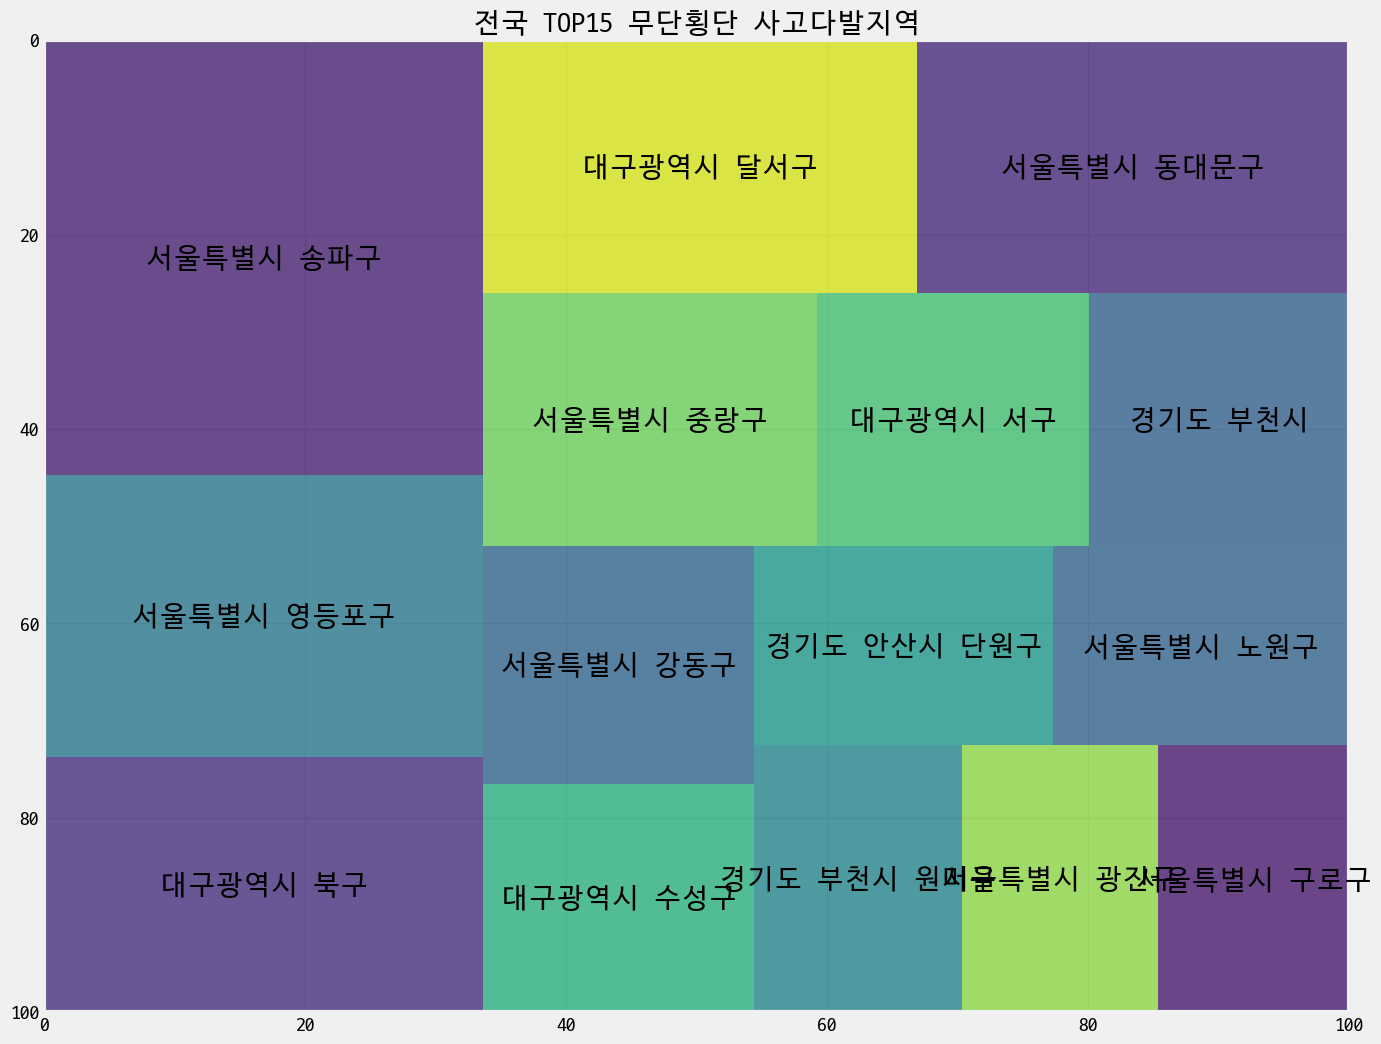

In [24]:
plt.figure(figsize=(15,12))
squarify.plot(
    sizes = map_list2[0]['count'],
    label = map_list2[0]['region'],
    alpha = 0.8,
    text_kwargs = {'fontsize' : 20}
)
plt.title(f'전국 TOP15 {title_array[0]} 사고다발지역')
plt.gca().invert_yaxis()
plt.show()


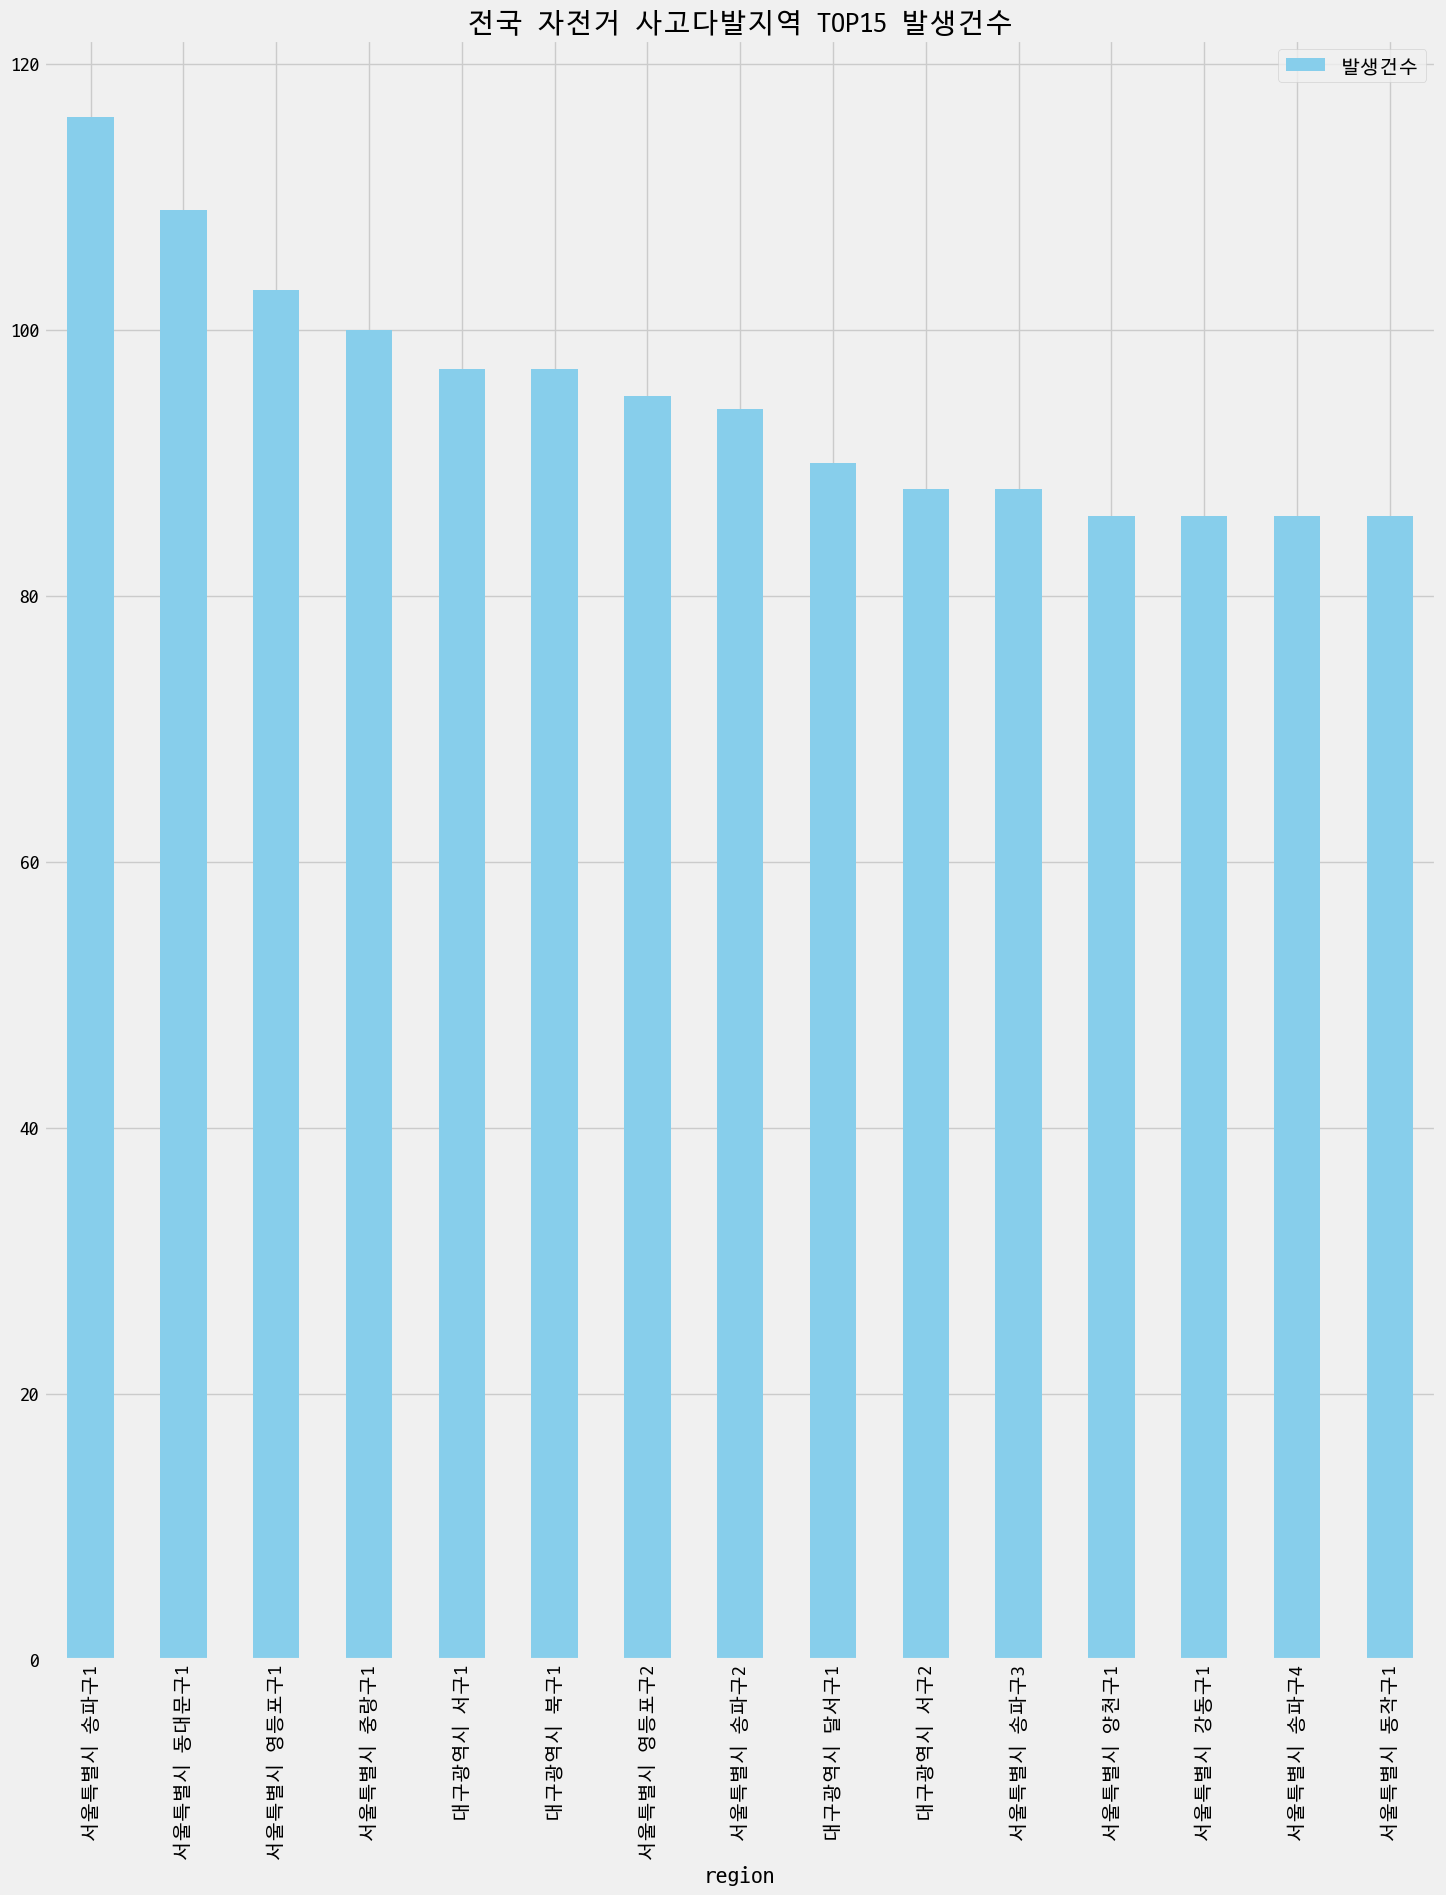

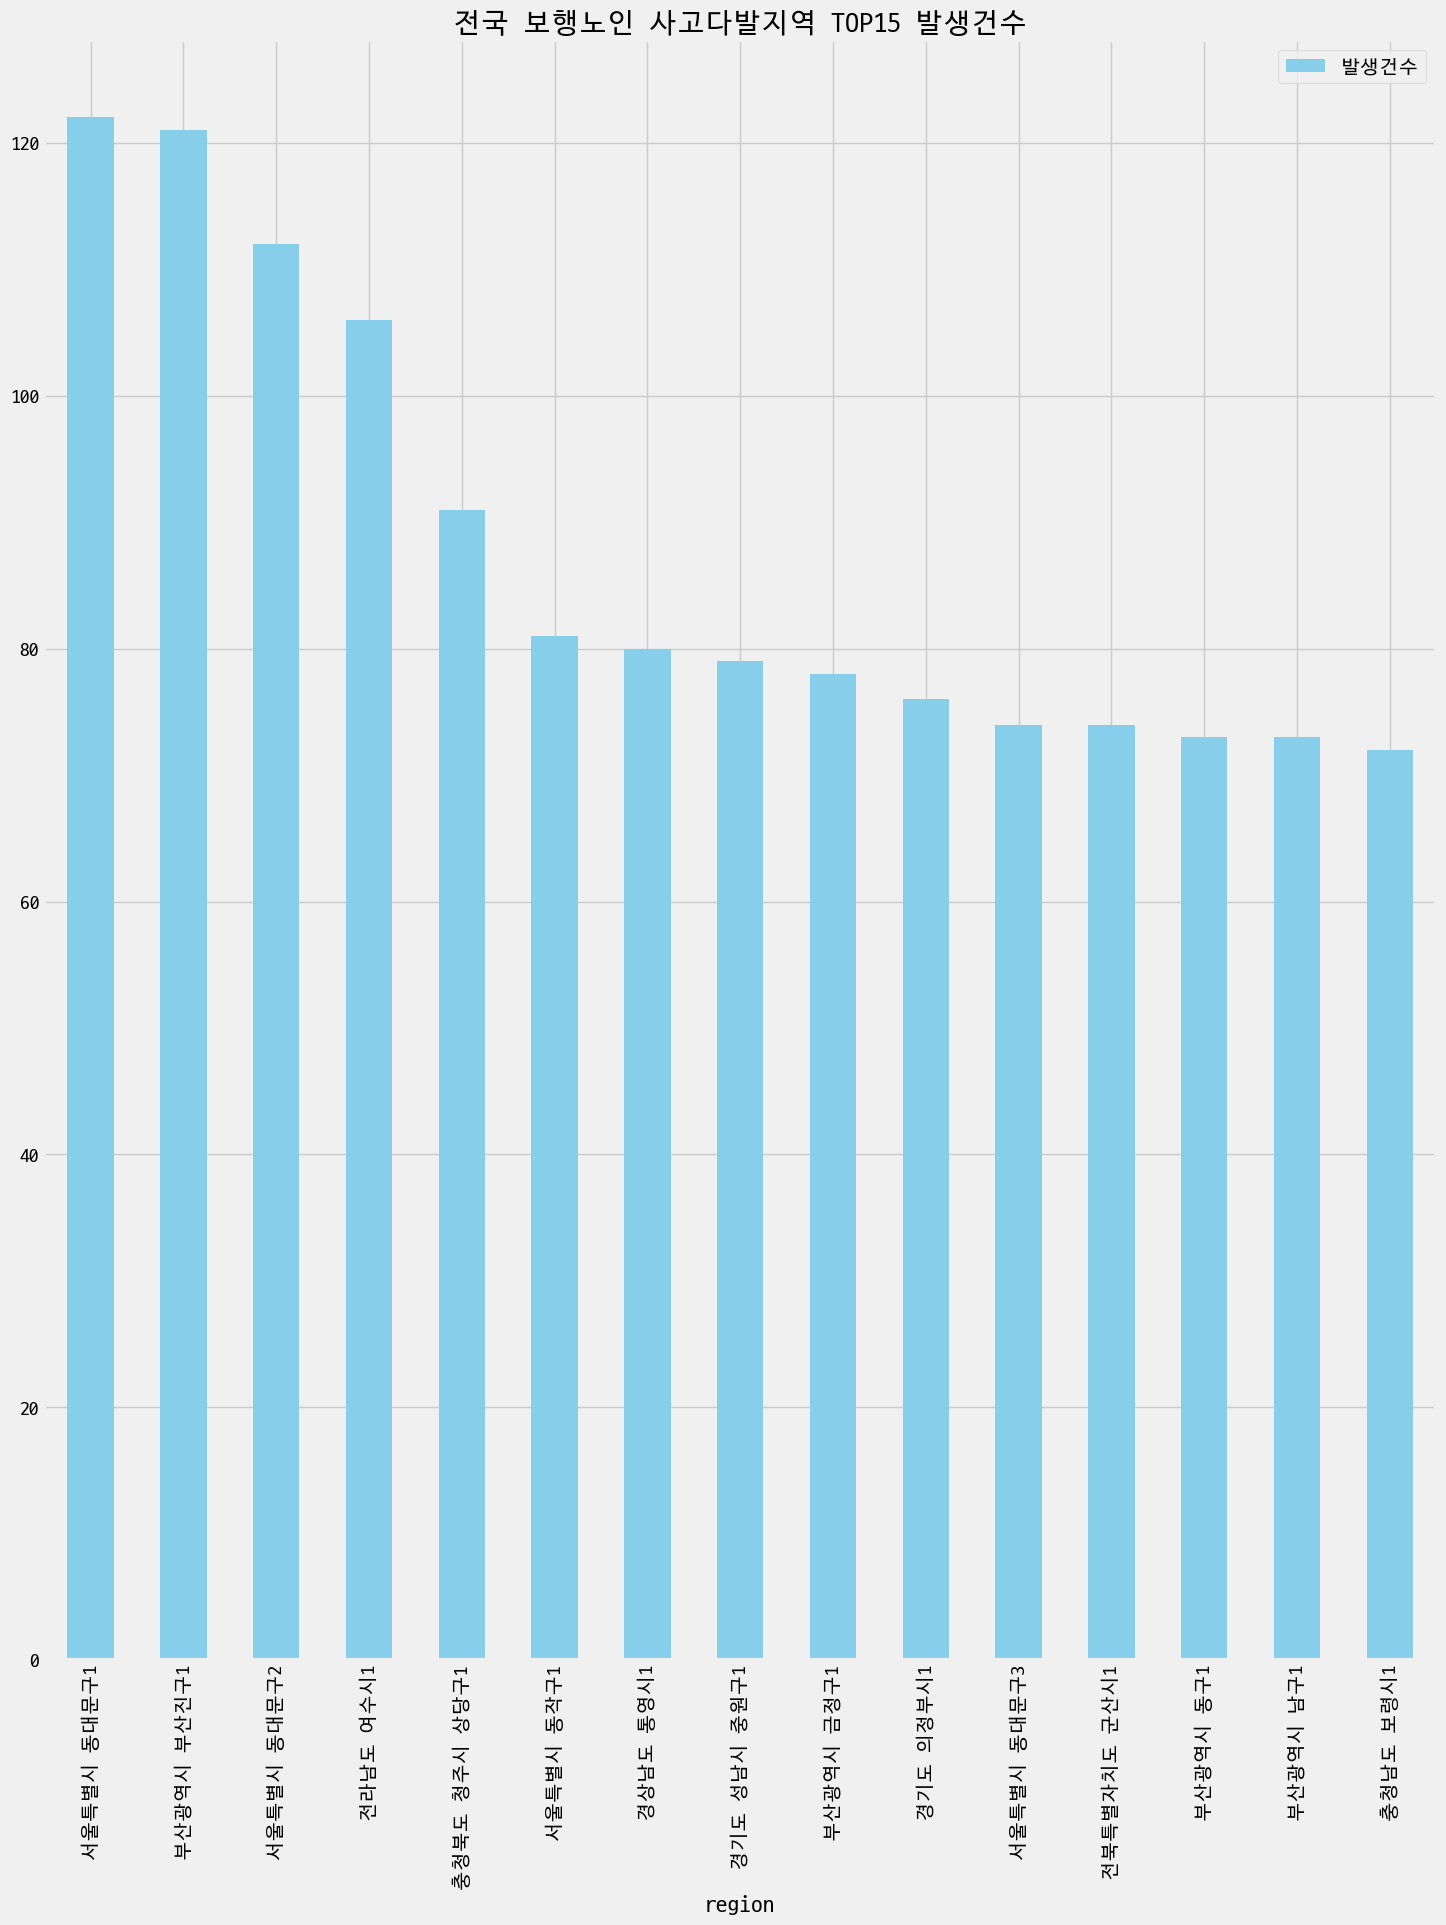

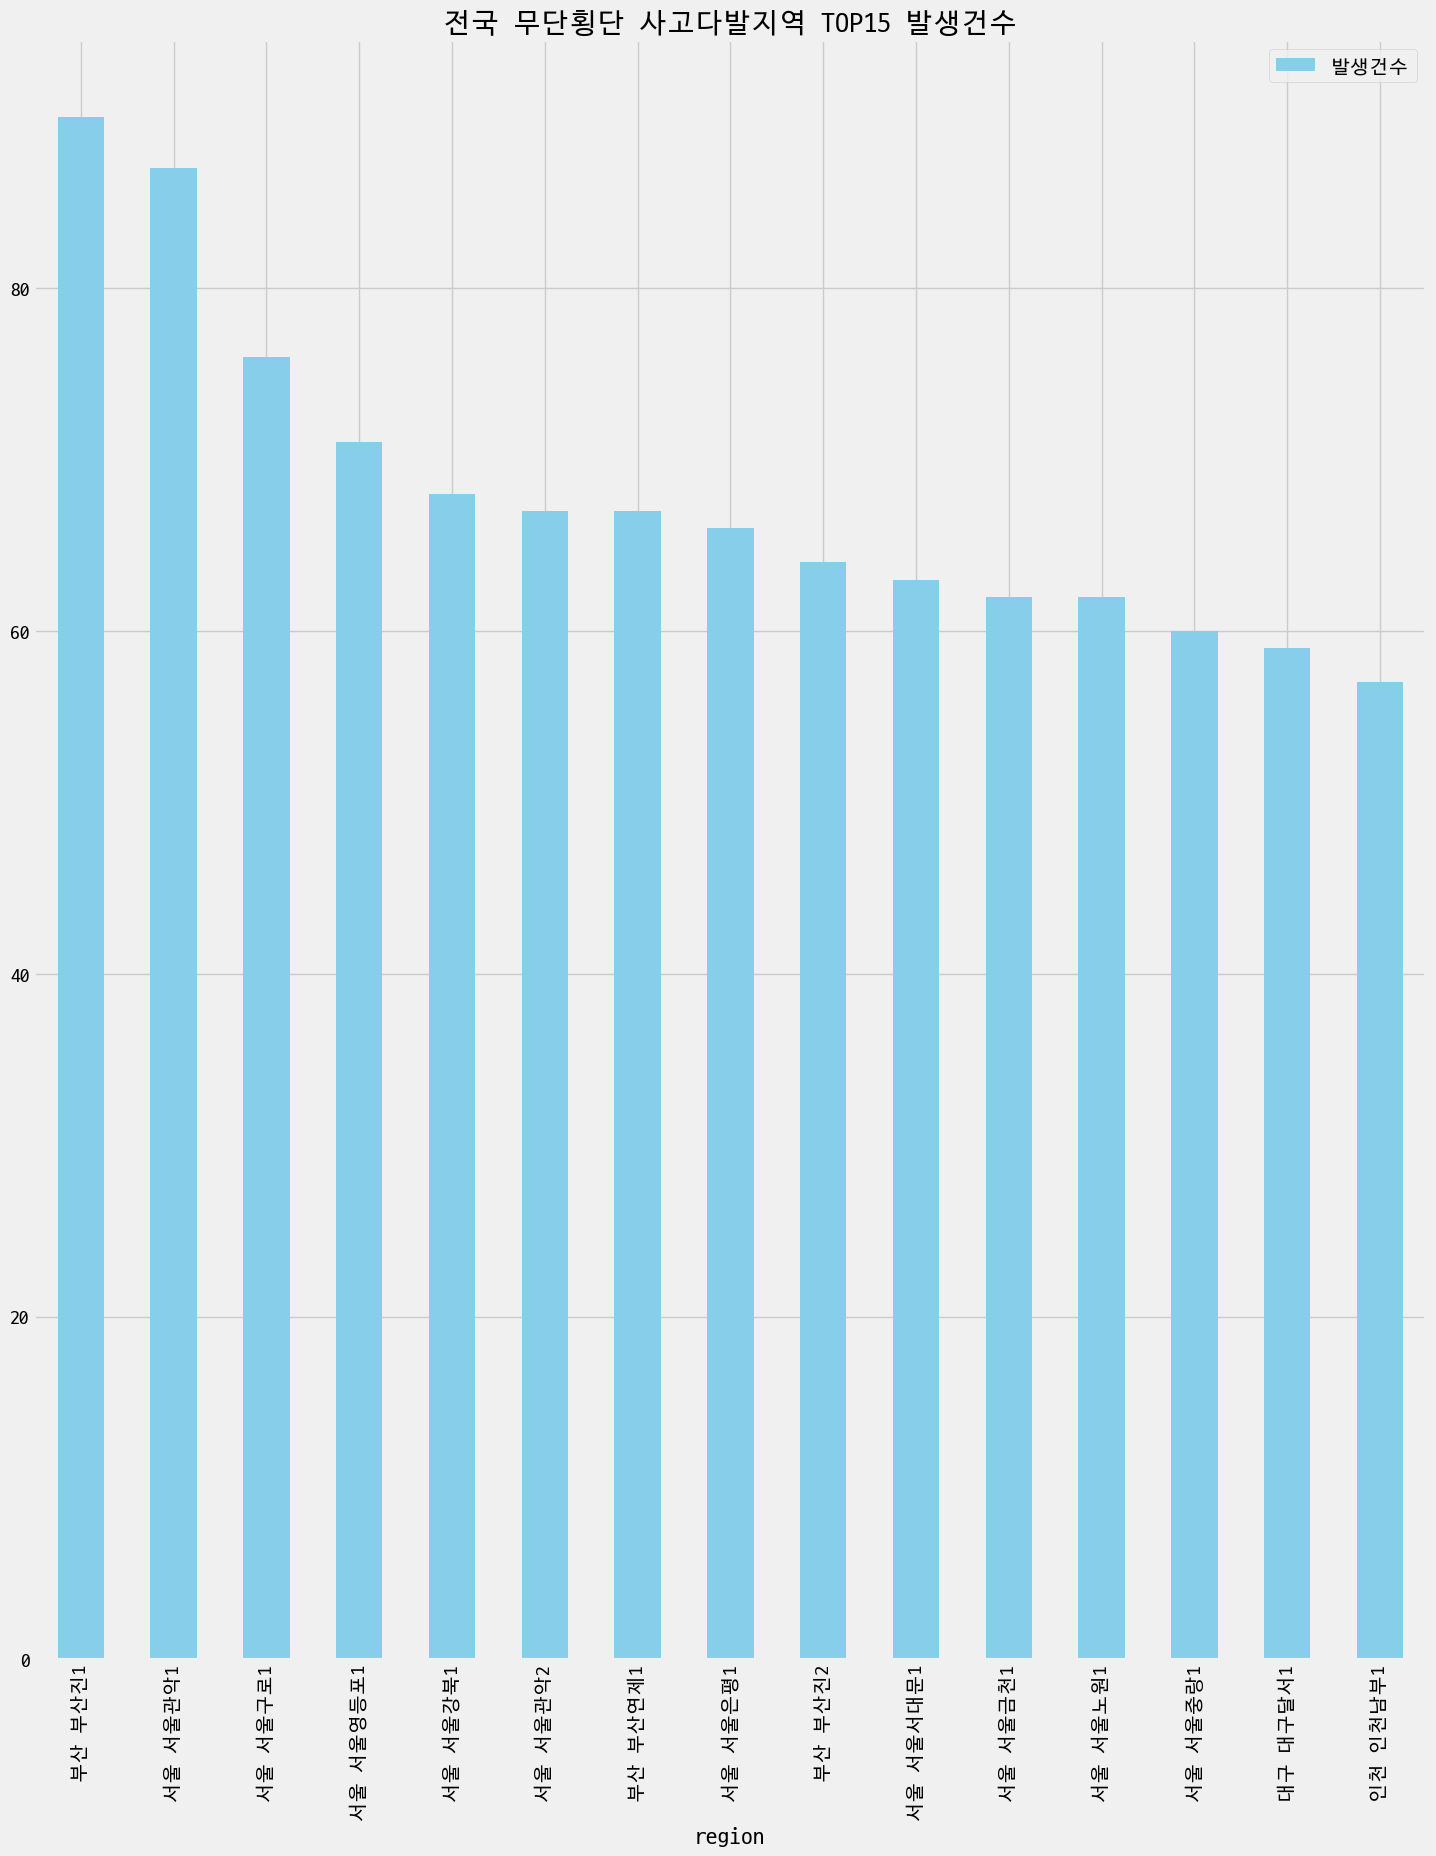

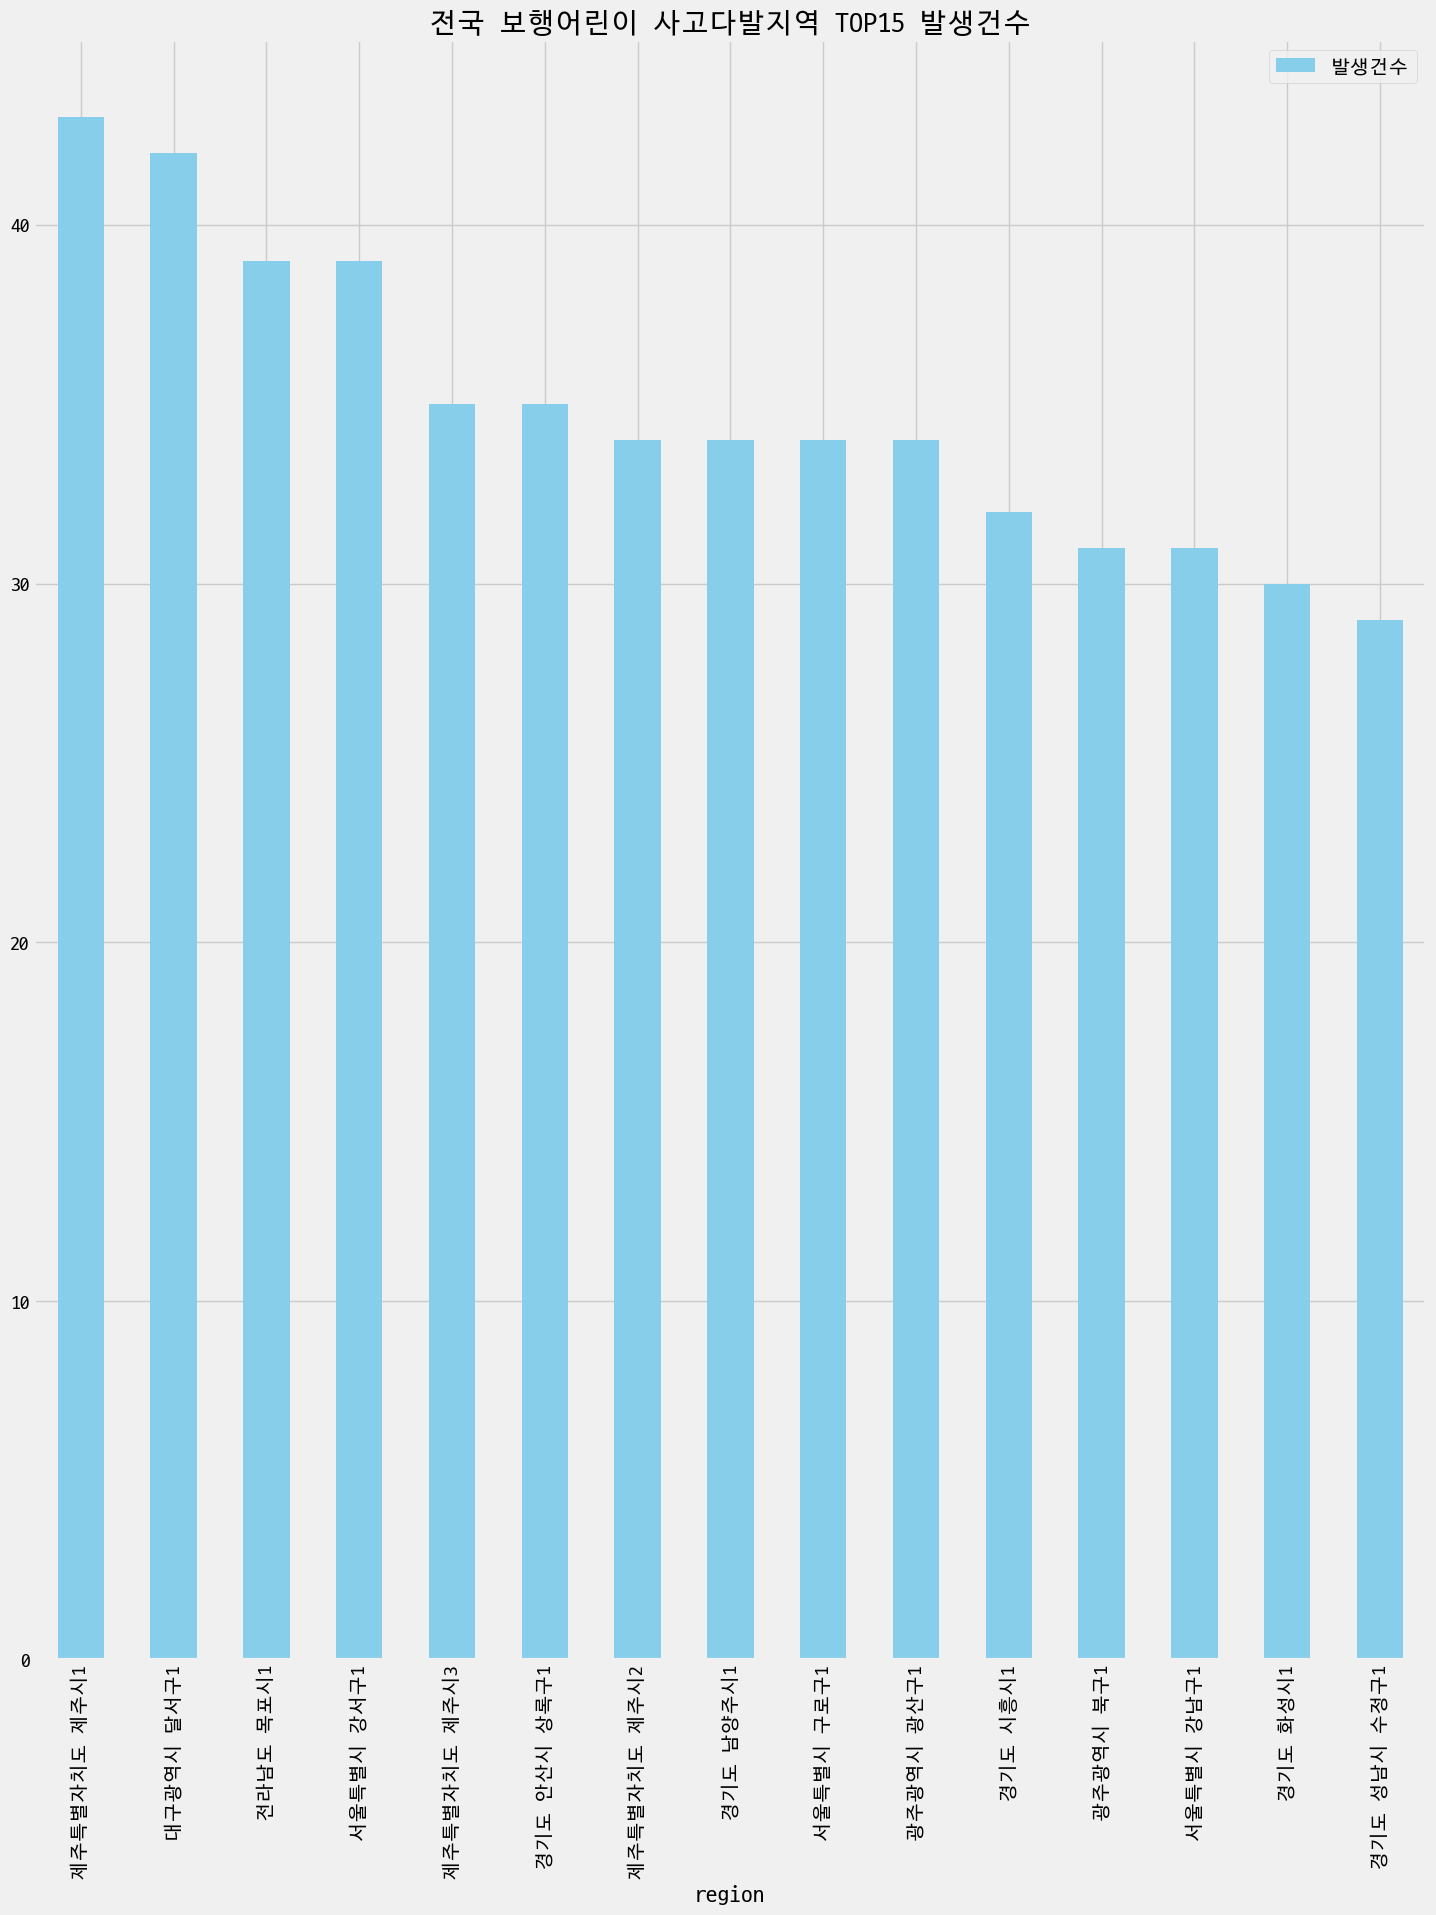

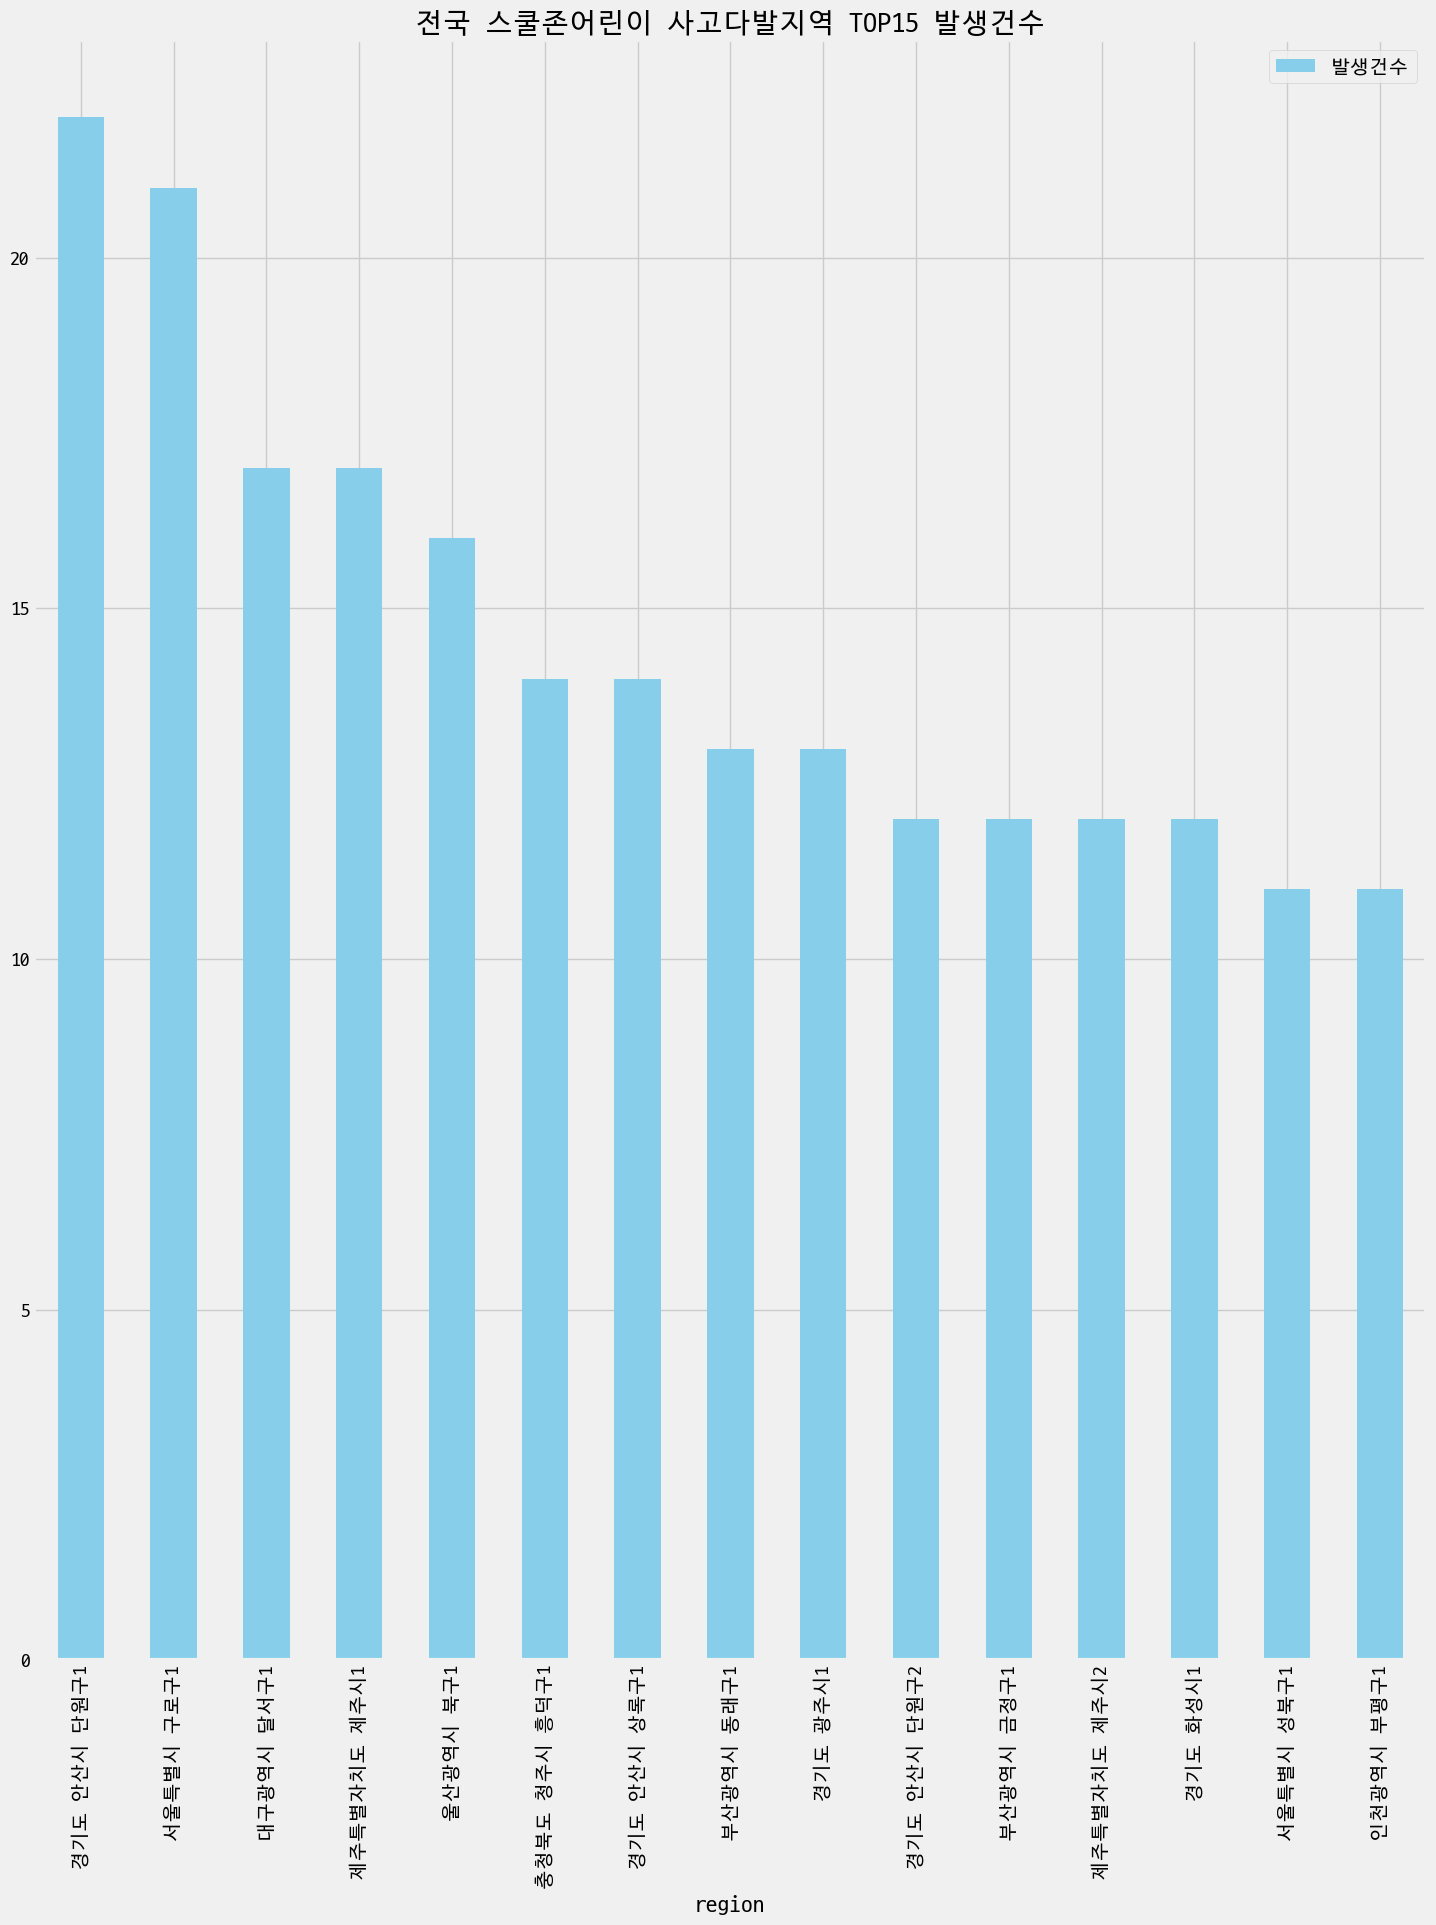

In [24]:
for t in title_array:
    data_plt_region = data_pick_map[data_pick_map['type'] == t].groupby('region')['accidents'].sum().reset_index(name='count').sort_values(['count'], ascending = 0).head(15)
    data_plt_region.plot( # 차트 그리기
        kind = 'bar',
        x = 'region',
        y = 'count',
        label = '발생건수', # data_plt_region['region'],
        figsize = (16, 20), # 사이즈 늘림
        # startangle = 90,
        title = f'전국 {t} 사고다발지역 TOP15 발생건수',
        color = 'Skyblue' # 색상: 라이트그린-다크블루(?)
    )